<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/Colab/Kai/quickhull_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [35]:
parseSides = lambda l, r, ps: (
  np.array([p for p in ps if aboveLine(l, r, p)]),
  np.array([p for p in ps if not aboveLine(l, r, p)])
)

In [45]:
def runProgram(num_points):
  points = sorted([[rnd.random()*10, rnd.random()*10] for _ in range(num_points)], key=lambda x: x[0])
  print(points)
  left = points[0]
  right = points[-1]

  hull_set = [left]

  upper_set, lower_set = parseSides(left, right, points)

  hull_set += sorted([arr.tolist() for arr in quickHull(upper_set, left, right, 1)]) # resort by x, smallest to largest

  hull_set.append(right)

  hull_set += sorted([arr.tolist() for arr in quickHull(lower_set, left, right, -1)],reverse=True) # resort by x, largest to smallest

  points = np.array([np.array(inner_list) for inner_list in points])
  hull_set = np.array([np.array(inner_list) for inner_list in hull_set])

  plt.scatter(points[:, 0], points[:, 1])
  plt.plot(hull_set[:, 0], hull_set[:, 1], color='red')

  return hull_set

In [37]:
def aboveLine(a,b,c):
  return (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0]) > 0

In [38]:
def furthestP(points,a,b):
  dist = 1/2 * np.abs(a[0]*(b[1] - points[:,1]) + b[0]*(points[:,1] - a[1]) + points[:,0]*(a[1] - b[1]))
  return points[np.argmax(dist)]

In [39]:
def quickHull(points,a,b,f):
  if points.size == 0 or a is None or b is None:
    return None

  c = furthestP(points,a,b)

  hull_set = []
  hull_set += [c]

  indices = np.where((points == c).all(axis=1))[0]
  points = np.delete(points, indices, axis=0)

  parseSides = lambda l, r, ps: (
    np.array([p for p in ps if aboveLine(l, r, p)]),
    np.array([p for p in ps if not aboveLine(l, r, p)])
  )

  set_1a, set_1b = parseSides(a,c,points)
  set_2b, set_2a = parseSides(b,c,points)

  if f == 1:
    a = quickHull(set_1a, a, c, 1)
    b = quickHull(set_2a, c, b, 1)
    if a != None:
      hull_set += a
    if b != None:
      hull_set += b

  else:
    a = quickHull(set_1b, a, c, -1)
    b = quickHull(set_2b, c, b, -1)
    if a != None:
      hull_set += a
    if b != None:
      hull_set += b

  return hull_set

[[0.2950087462260065, 8.369229118982393], [0.4167112424849406, 8.063159197222944], [1.592869636904043, 5.055766523678898], [1.8782000696184065, 9.29797706893811], [1.9039807383802143, 3.204820906836644], [2.2298838243498222, 0.2965577739925118], [2.8013829598275377, 8.581408119602568], [3.1904205782109707, 3.106617575855272], [3.9174183595587353, 3.165629461635379], [3.9820298259251152, 0.5251067199694703], [4.446265431060764, 0.9207565366047732], [4.796387986522004, 5.148589933657384], [5.003681935875363, 0.4322917345628319], [5.4302020255866505, 8.875711976283895], [5.723638995723666, 5.152997441892325], [6.7558442026870935, 3.958980866989469], [7.256308950896758, 5.606406333696224], [7.263855320471299, 1.5458386028868587], [8.160269158829989, 3.9653391611203306], [9.827516967272519, 8.100868800117876]]


array([[0.29500875, 8.36922912],
       [1.87820007, 9.29797707],
       [5.43020203, 8.87571198],
       [9.82751697, 8.1008688 ],
       [7.26385532, 1.5458386 ],
       [5.00368194, 0.43229173],
       [2.22988382, 0.29655777],
       [0.29500875, 8.36922912]])

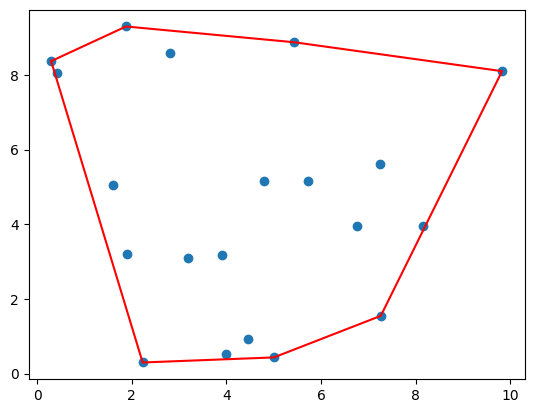

In [54]:
runProgram(20)